In [1]:
import pandas as pd
import os.path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.metrics import confusion_matrix
path = "../data/"

if not os.path.isfile(path+"seroprevalencia_cali.csv"):
    seroprev_cali_excel = pd.read_excel(path+"datos_seroprevalencia.xlsx",sheet_name='CALI')
    seroprev_bquilla_excel = pd.read_excel(path+"datos_seroprevalencia.xlsx",sheet_name='BQUILLA')

    
    seroprev_cali_excel.to_csv(path+"/cali/seroprevalencia_cali.csv",index=False)
    seroprev_bquilla_excel.to_csv(path+"/bquilla/seroprevalencia_bquilla.csv",index=False)

    
df_cali    = pd.read_csv(path+"/cali/seroprevalencia_cali.csv")
df_bquilla = pd.read_csv(path+"/bquilla/seroprevalencia_bquilla.csv")

In [2]:
print(df_cali.shape)
print(df_bquilla.shape)

(703, 40)
(627, 40)
(1330, 40)


Se quitan los datos de raza, diagnosticado_covid

In [3]:
df_cali    = df_cali.drop(['raza','diagnosticado_covid'], axis=1)
df_bquilla = df_bquilla.drop(['raza','diagnosticado_covid'], axis=1)

## DATOS CALI

### 1. Matriz de correlación

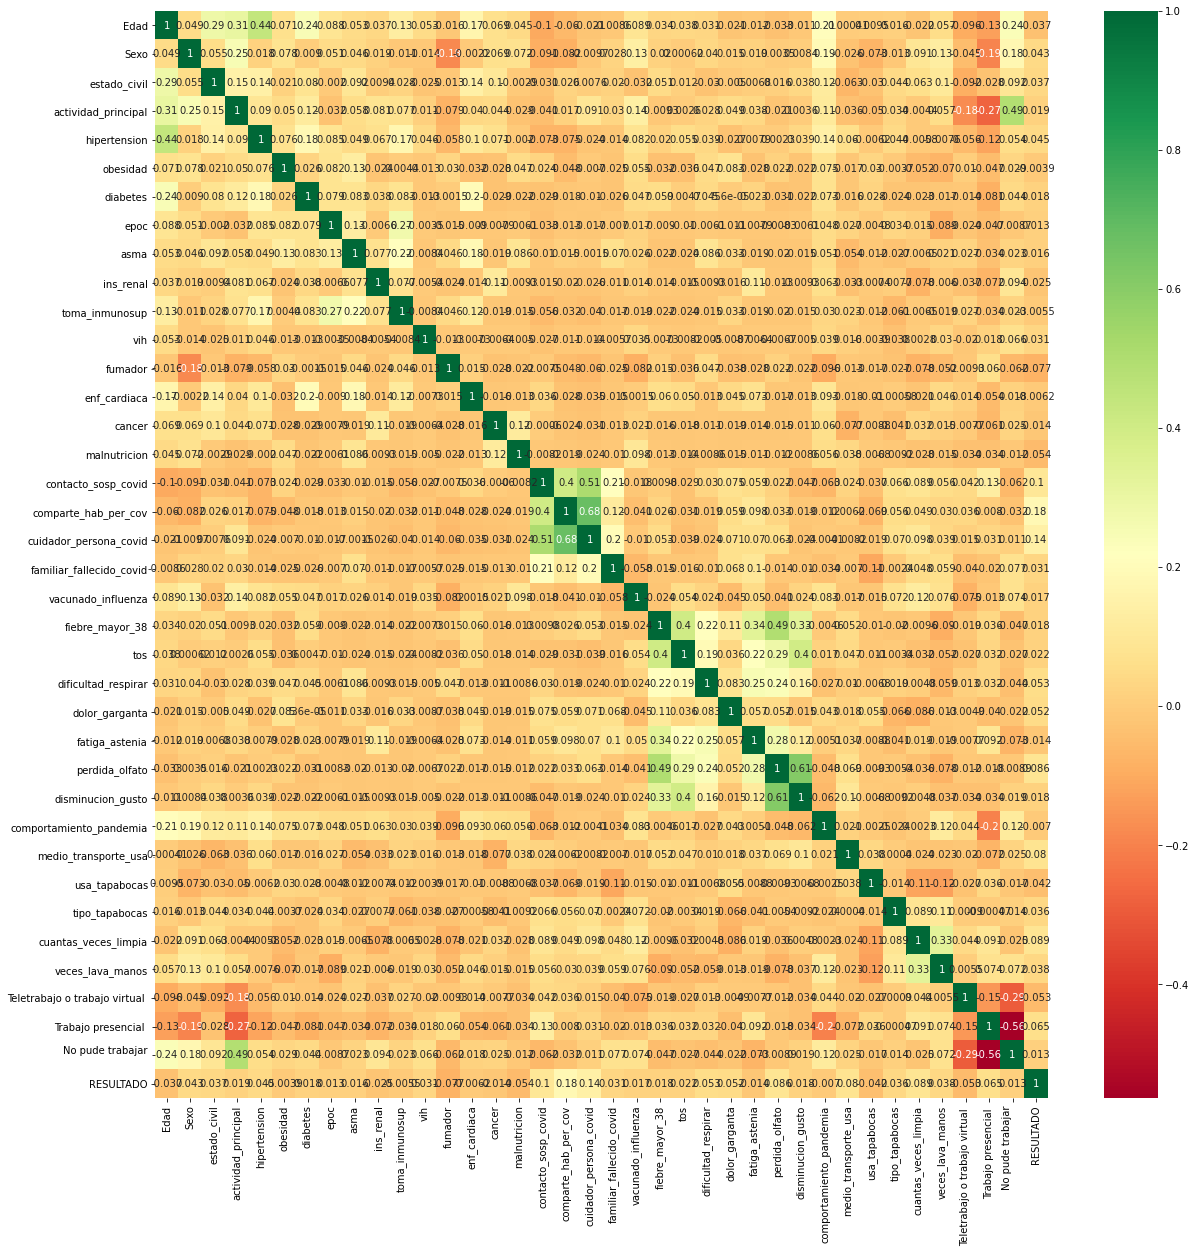

In [6]:
#Se hacen correlaciones para eliminar las columnas totalmente relacionadas.
corrmat = df_cali.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cali[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [130]:
data_cali = df_cali.sample(frac=0.95, random_state=123)
data_unseen_cali = df_cali.drop(data_cali.index)
print("Datos totales de Cali: %s, datos para entrenamiento: %s, datos para pruebas: %s " % (df_cali.shape[0],data_cali.shape[0],data_unseen_cali.shape[0]))
## reset de los indices
data_cali.reset_index(inplace=True, drop=True)
data_unseen_cali.reset_index(inplace=True, drop=True)

Datos totales de Cali: 703, datos para entrenamiento: 668, datos para pruebas: 35 


In [131]:
#Configuración de los modelos de Cali
model_setup_cali = setup(data=data_cali, target='RESULTADO', session_id=123)

In [132]:
best_model_cali = compare_models()

#### Modelo CatBoost para Cali

In [133]:
catboost_cali = create_model('catboost')
print(catboost_cali)

#### Modelo Random Forest para Cali

In [134]:
rf_cali = create_model('rf')

In [135]:
print(rf_cali)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


#### Ada Boost para Cali

In [136]:
ada_cali = create_model('ada')

In [137]:
print(ada_cali)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


#### Tuneo de los modelos de Cali

In [138]:
tuned_catboost_cali = tune_model(catboost_cali)
print(tuned_catboost_cali)

In [139]:
tuned_ada_cali = tune_model(ada_cali)
print(tuned_ada_cali)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.092, n_estimators=10, random_state=123)


#### Curvas ROC de los modelos de cali

In [140]:
## AUC Plot
##plot_model(tuned_catboost_cali, plot = 'auc')

In [141]:
## AUC Plot
##plot_model(rf_cali, plot = 'auc')

In [142]:
## AUC Plot
##plot_model(tuned_ada_cali, plot = 'auc')

#### Atributos mas importantes de los modelos de Cali

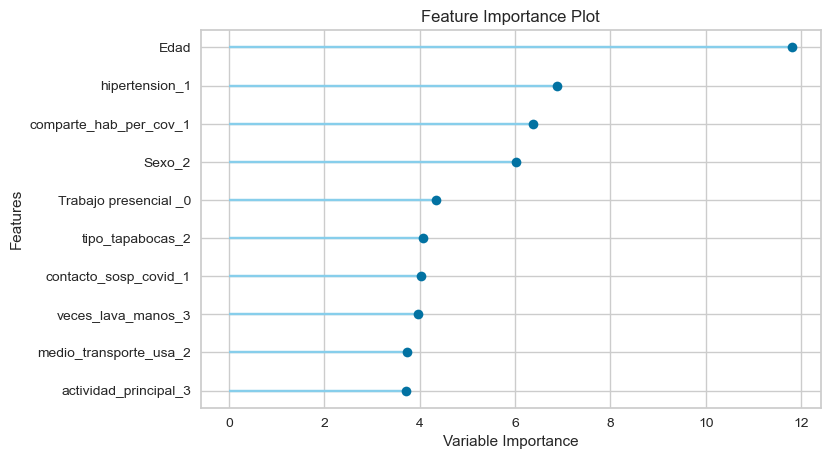

In [143]:
## feature importance
plot_model(tuned_catboost_cali, plot='feature')

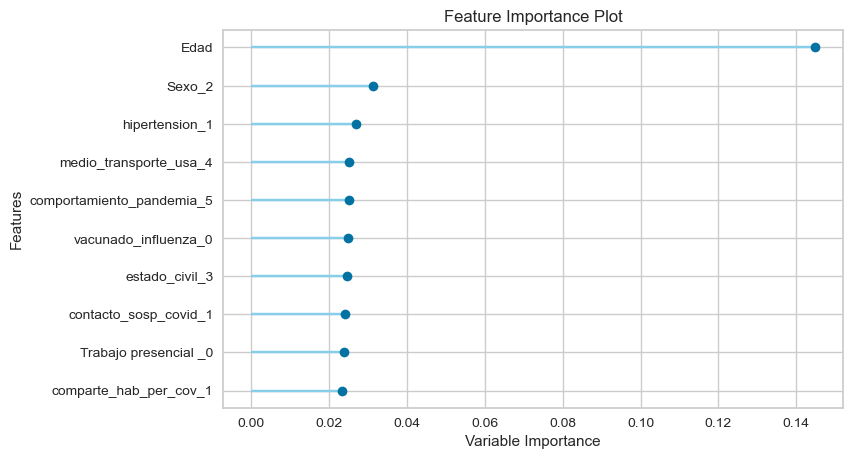

In [144]:
## feature importance
plot_model(rf_cali, plot='feature')

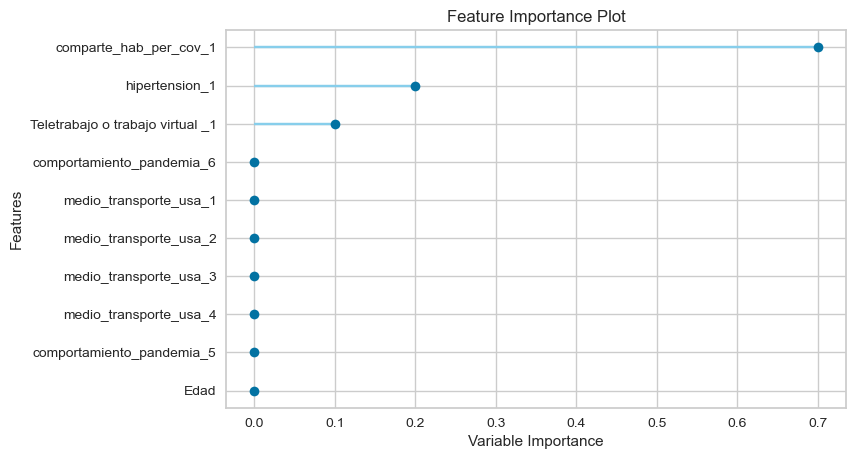

In [145]:
## feature importance
plot_model(tuned_ada_cali, plot='feature')

#### Terminando los modelos de cali

In [146]:
unseen_predictions_catboost_cali = predict_model(final_catboost_cali, data=data_unseen_cali)
unseen_predictions_catboost_cali.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    62     2             4                    4             0         0   
1    46     2             3                    3             0         0   
2    46     1             2                    3             0         0   
3    67     1             2                    7             0         0   
4    33     2             1                    2             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         0     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               2   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               1   
1                     4                 3                               0   
2                     4                 3                               0   
3                     2                 1                               0   
4                     2                 3                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label   Score  
0                    0                   0          0      0  0.8037  
1                    1                   0          0      1  0.7325  
2                    0                   1          0      0  0.7896  
3                    0                   1          0      0  0.9279  
4                    0                   0          0      0  0.8275  

[5 rows x 40 columns]

In [147]:
predict_model(final_rf_cali)

unseen_predictions_rf_cali = predict_model(final_rf_cali, data=data_unseen_cali)
unseen_predictions_rf_cali.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    62     2             4                    4             0         0   
1    46     2             3                    3             0         0   
2    46     1             2                    3             0         0   
3    67     1             2                    7             0         0   
4    33     2             1                    2             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         0     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               2   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               1   
1                     4                 3                               0   
2                     4                 3                               0   
3                     2                 1                               0   
4                     2                 3                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label  Score  
0                    0                   0          0      0   0.79  
1                    1                   0          0      0   0.52  
2                    0                   1          0      0   0.82  
3                    0                   1          0      0   0.96  
4                    0                   0          0      0   0.82  

[5 rows x 40 columns]

In [148]:
final_ada_cali = finalize_model(tuned_ada_cali)
print(final_ada_cali)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.092, n_estimators=10, random_state=123)


In [149]:
predict_model(final_ada_cali)

unseen_predictions_ada_cali = predict_model(final_ada_cali, data=data_unseen_cali)
unseen_predictions_ada_cali.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    62     2             4                    4             0         0   
1    46     2             3                    3             0         0   
2    46     1             2                    3             0         0   
3    67     1             2                    7             0         0   
4    33     2             1                    2             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         0     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               2   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               1   
1                     4                 3                               0   
2                     4                 3                               0   
3                     2                 1                               0   
4                     2                 3                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label   Score  
0                    0                   0          0      0  0.6845  
1                    1                   0          0      1  0.6694  
2                    0                   1          0      0  0.6845  
3                    0                   1          0      0  0.7065  
4                    0                   0          0      0  0.6845  

[5 rows x 40 columns]

#### Resultado de todos los datos para visualización

In [67]:
predictions_catboost_cali = predict_model(final_catboost_cali, data=df_cali)
predictions_ada_cali = predict_model(final_ada_cali, data=df_cali)
predictions_rf_cali = predict_model(final_rf_cali, data=df_cali)

#### Se guardan los resultados con su probabilidad para visualización

In [68]:
## se guardarán solo las columnas RESULTADO, Lavel, Score
columnas = ["RESULTADO","Label","Score"]
predictions_catboost_cali[columnas].to_csv(path+"/cali/predictions/predictions_catboost_cali.csv",index=False)
predictions_ada_cali[columnas].to_csv(path+"/cali/predictions/predictions_ada_cali.csv",index=False)
predictions_rf_cali[columnas].to_csv(path+"/cali/predictions/predictions_rf_cali.csv",index=False)

In [126]:
resultados_cali_catboost = pd.read_csv(path+"/cali/predictions/predictions_catboost_cali.csv")
resultados_cali_ada      = pd.read_csv(path+"/cali/predictions/predictions_ada_cali.csv")
resultados_cali_rf       = pd.read_csv(path+"/cali/predictions/predictions_rf_cali.csv")

In [70]:
def plot_conf_matrix(title,y_test,y_pred):
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predicción', fontsize=18)
    plt.ylabel('Real', fontsize=18)
    plt.title(title, fontsize=18)
    plt.show()

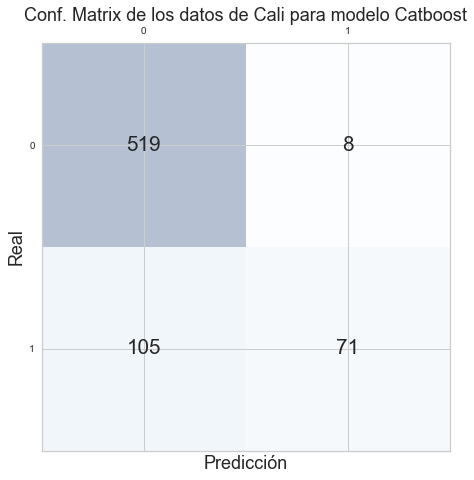

In [125]:
plot_conf_matrix('Conf. Matrix de los datos de Cali para modelo Catboost',resultados_cali_catboost['RESULTADO'],resultados_cali_catboost["Label"])

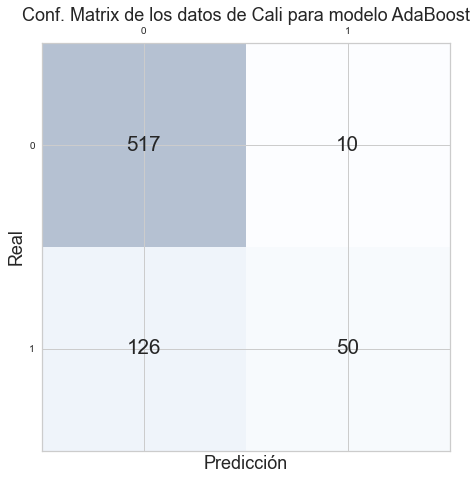

In [127]:
plot_conf_matrix('Conf. Matrix de los datos de Cali para modelo AdaBoost',resultados_cali_ada['RESULTADO'],resultados_cali_ada["Label"])

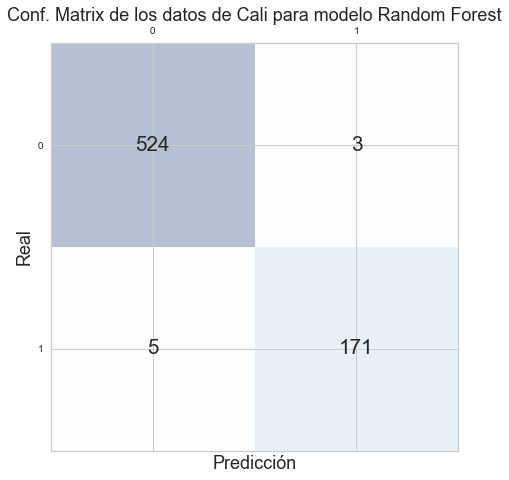

In [73]:
plot_conf_matrix('Conf. Matrix de los datos de Cali para modelo Random Forest',resultados_cali_rf['RESULTADO'],resultados_cali_rf["Label"])

## DATOS BQUILLA

### 1. Matriz de correlación

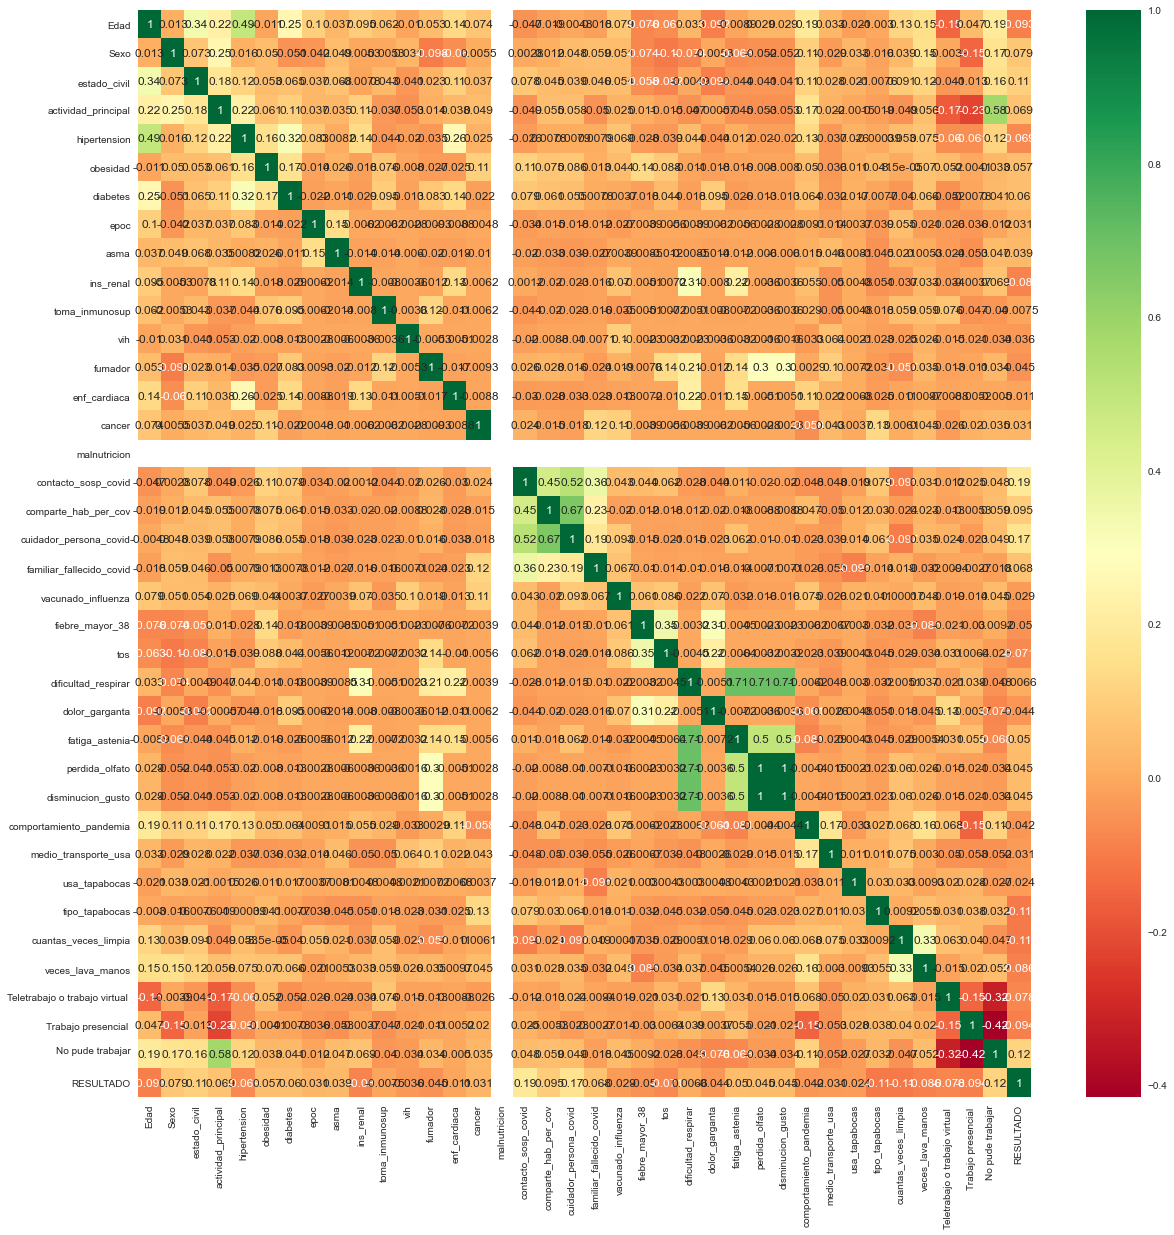

In [74]:
#Se hacen correlaciones para eliminar las columnas totalmente relacionadas.
corrmat = df_bquilla.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_bquilla[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [76]:
## sample returns a random sample from an axis of the object. That would be 950 samples, not 1000
data_bquilla = df_bquilla.sample(frac=0.95, random_state=123)
data_unseen_bquilla = df_bquilla.drop(data_bquilla.index)
print("Datos totales de Bquilla: %s, datos para entrenamiento: %s, datos para pruebas: %s " % (df_bquilla.shape[0],data_bquilla.shape[0],data_unseen_cali.shape[0]))

data_bquilla.reset_index(inplace=True, drop=True)
data_unseen_bquilla.reset_index(inplace=True, drop=True)

Datos totales de Bquilla: 627, datos para entrenamiento: 596, datos para pruebas: 35 


In [77]:
#Configuración de los modelos de Bquilla
model_setup_bquilla = setup(data=data_bquilla, target='RESULTADO', session_id=1234)

In [78]:
best_model_bquilla = compare_models()

#### Modelo GBC para Bquilla

In [79]:
gbc_bquilla = create_model('gbc')
print(gbc_bquilla)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Modelo Logistic Regresion para  Bquilla

In [80]:
lr_bquilla = create_model('lr')

In [81]:
print(lr_bquilla)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### Naibe Bayes para Bquilla

In [82]:
nb_bquilla = create_model('nb')

In [83]:
print(nb_bquilla)

GaussianNB(priors=None, var_smoothing=1e-09)


#### Tuneo de los modelos de Bquilla

In [84]:
tuned_gbc_bquilla = tune_model(gbc_bquilla)
print(tuned_gbc_bquilla)

tuned_lr_bquilla = tune_model(lr_bquilla)
print(tuned_lr_bquilla)

tuned_nb_bquilla = tune_model(nb_bquilla) 
print(tuned_nb_bquilla)

GaussianNB(priors=None, var_smoothing=0.001)


#### Curvas ROC de los modelos de Bquilla

In [85]:
## AUC Plot
##plot_model(tuned_gbc_bquilla, plot = 'auc')

In [86]:
## AUC Plot
##plot_model(tuned_lr_bquilla, plot = 'auc')

In [87]:
## AUC Plot
##plot_model(tuned_nb_bquilla, plot = 'auc')

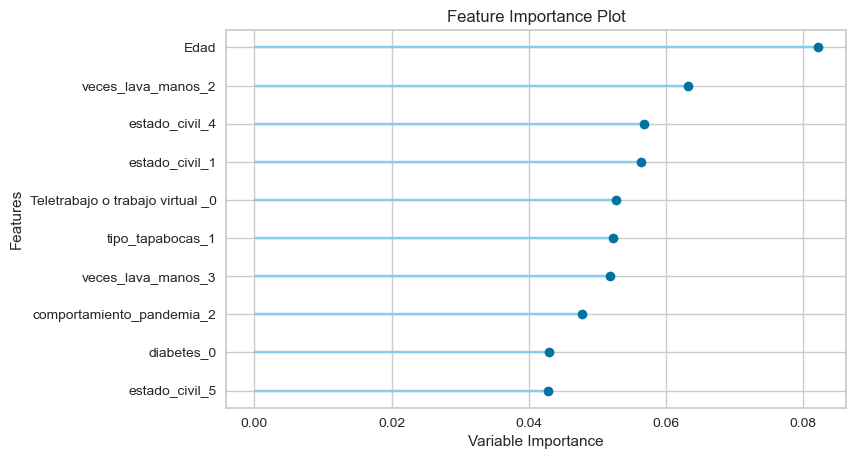

In [88]:
## feature importance
plot_model(tuned_gbc_bquilla, plot='feature')

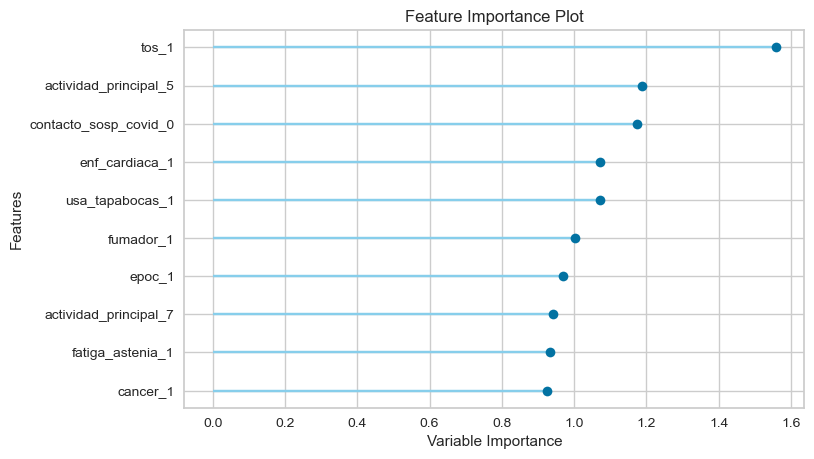

In [89]:
## feature importance

plot_model(tuned_lr_bquilla, plot='feature')

#### Terminando los modelos de bquilla

In [91]:
final_gbc_bquilla = finalize_model(tuned_gbc_bquilla)
print(final_gbc_bquilla)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.489, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=0.3, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [92]:
predict_model(final_gbc_bquilla)
unseen_predictions_gbc_bquilla = predict_model(final_gbc_bquilla, data=data_unseen_bquilla)
unseen_predictions_gbc_bquilla.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    48     2             2                    2             0         0   
1    34     2             2                    2             0         0   
2    46     2             3                    3             1         1   
3    16     1             1                    4             0         0   
4    18     1             1                    4             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         1     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               1   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               0   
1                     2                 3                               1   
2                     2                 3                               0   
3                     4                 2                               0   
4                     2                 2                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label   Score  
0                    0                   1          1      0  0.8830  
1                    0                   0          1      1  0.6334  
2                    1                   0          0      1  0.9365  
3                    0                   0          1      1  0.5427  
4                    0                   0          1      0  0.5977  

[5 rows x 40 columns]

In [93]:
final_lr_bquilla = finalize_model(tuned_lr_bquilla)
print(final_lr_bquilla)

LogisticRegression(C=2.055, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [94]:

unseen_predictions_lr_bquilla = predict_model(final_lr_bquilla, data=data_unseen_bquilla)
unseen_predictions_lr_bquilla.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    48     2             2                    2             0         0   
1    34     2             2                    2             0         0   
2    46     2             3                    3             1         1   
3    16     1             1                    4             0         0   
4    18     1             1                    4             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         1     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               1   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               0   
1                     2                 3                               1   
2                     2                 3                               0   
3                     4                 2                               0   
4                     2                 2                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label   Score  
0                    0                   1          1      1  0.7264  
1                    0                   0          1      1  0.5248  
2                    1                   0          0      1  0.9319  
3                    0                   0          1      0  0.5115  
4                    0                   0          1      0  0.7241  

[5 rows x 40 columns]

In [95]:
final_nb_bquilla = finalize_model(tuned_nb_bquilla)
print(final_nb_bquilla)

GaussianNB(priors=None, var_smoothing=0.001)


In [96]:
unseen_predictions_nb_bquilla = predict_model(final_nb_bquilla, data=data_unseen_bquilla)
unseen_predictions_nb_bquilla.head()

Edad  Sexo  estado_civil  actividad_principal  hipertension  obesidad  \
0    48     2             2                    2             0         0   
1    34     2             2                    2             0         0   
2    46     2             3                    3             1         1   
3    16     1             1                    4             0         0   
4    18     1             1                    4             0         0   

   diabetes  epoc  asma  ins_renal  ...  usa_tapabocas  tipo_tapabocas  \
0         0     0     0          0  ...              1               1   
1         0     0     0          0  ...              1               1   
2         1     0     0          0  ...              1               1   
3         0     0     0          0  ...              1               1   
4         0     0     0          0  ...              1               1   

   cuantas_veces_limpia  veces_lava_manos  Teletrabajo o trabajo virtual   \
0                     2                 3                               0   
1                     2                 3                               1   
2                     2                 3                               0   
3                     4                 2                               0   
4                     2                 2                               1   

   Trabajo presencial   No pude trabajar\n  RESULTADO  Label   Score  
0                    0                   1          1      0  0.5766  
1                    0                   0          1      0  0.6353  
2                    1                   0          0      1  0.6238  
3                    0                   0          1      0  0.6205  
4                    0                   0          1      0  0.6343  

[5 rows x 40 columns]

#### Resultado de todos los datos para visualización

In [97]:
predictions_gbc_bquilla = predict_model(final_gbc_bquilla,data=df_bquilla)
predictions_lr_bquilla  = predict_model(final_lr_bquilla, data=df_bquilla)
predictions_nb_bquilla  = predict_model(final_nb_bquilla, data=df_bquilla)

#### Se guardan los resultados con su probabilidad para visualización

In [100]:
## se guardarán solo las columnas RESULTADO, Lavel, Score
columnas = ["RESULTADO","Label","Score"]
predictions_gbc_bquilla[columnas].to_csv(path+"/bquilla/predictions/predictions_gbc_bquilla.csv",index=False)
predictions_lr_bquilla[columnas].to_csv(path+"/bquilla/predictions/predictions_lr_bquilla.csv",index=False)
predictions_nb_bquilla[columnas].to_csv(path+"/bquilla/predictions/predictions_nb_bquilla.csv",index=False)

In [118]:
resultados_bquilla_gbc = pd.read_csv(path+"/bquilla/predictions/predictions_gbc_bquilla.csv")
resultados_bquilla_lr  = pd.read_csv(path+"/bquilla/predictions/predictions_lr_bquilla.csv")
resultados_bquilla_nb  = pd.read_csv(path+"/bquilla/predictions/predictions_nb_bquilla.csv")

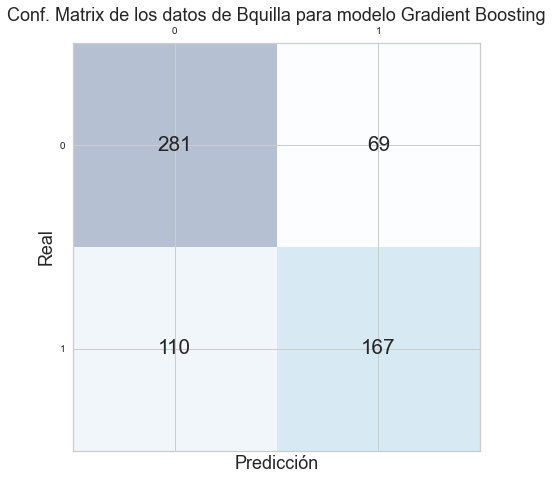

In [111]:
plot_conf_matrix('Conf. Matrix de los datos de Bquilla para modelo Gradient Boosting',resultados_bquilla_gbc['RESULTADO'],resultados_bquilla_gbc["Label"])

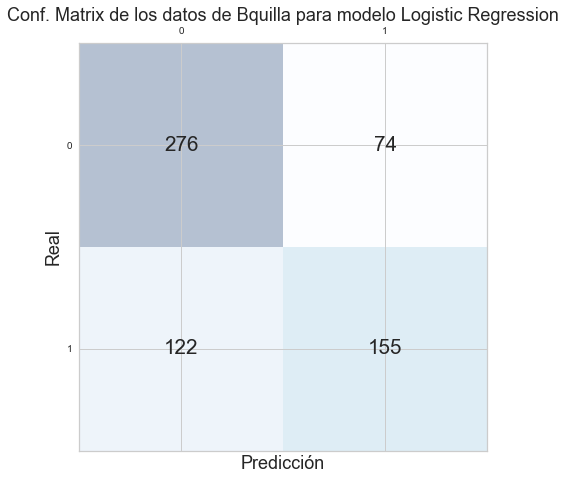

In [113]:
plot_conf_matrix('Conf. Matrix de los datos de Bquilla para modelo Logistic Regression',resultados_bquilla_lr['RESULTADO'],resultados_bquilla_lr["Label"])

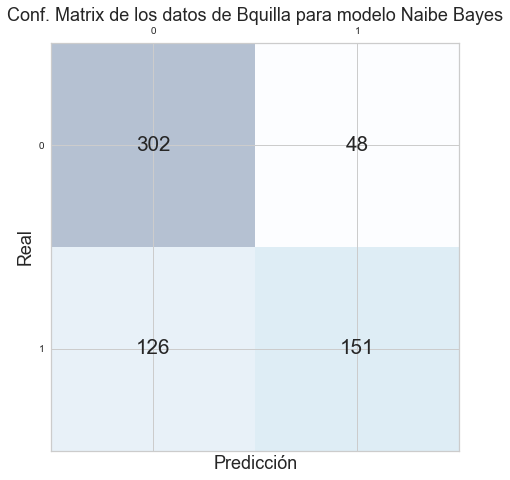

In [119]:
plot_conf_matrix('Conf. Matrix de los datos de Bquilla para modelo Naibe Bayes',resultados_bquilla_nb['RESULTADO'],resultados_bquilla_nb["Label"])